In [2]:
%load_ext autoreload
%autoreload 2


from fastai.text import *
from fastai.text.data import DataBunch
from fastai.datasets import *
from pathlib import Path
import pandas as pd
from fastai.metrics import *
from fastai.train import *
from fastai.vision import *
from fastai.imports import nn, torch
from sklearn import metrics
from fastai.callbacks import *
from fastai.basic_train import get_preds

import sklearn.metrics
import datetime
import news_utils
from pathlib import Path

import fastai
fastai.__version__

'1.0.28'

In [3]:
EX_PA = Path('/mnt/data/group07/johannes/ynacc_proc/replicate/lmmodels')

In [16]:
data_lm2 = TextLMDataBunch.load(EX_PA)

In [17]:
data_lm2.vocab.itos

['xxunk',
 'xxpad',
 '.',
 'the',
 ',',
 'to',
 'and',
 'a',
 '1',
 'xxfld',
 'of',
 'you',
 'is',
 'that',
 'i',
 'xxup',
 'in',
 'it',
 'are',
 '"',
 'for',
 'not',
 '?',
 'they',
 "n't",
 'have',
 "'s",
 'do',
 'be',
 'with',
 'was',
 '!',
 'on',
 'this',
 'as',
 'your',
 'he',
 'or',
 'but',
 'people',
 'if',
 '-',
 'all',
 'what',
 'so',
 'just',
 'their',
 'who',
 'we',
 'like',
 'no',
 'would',
 'about',
 'she',
 'will',
 'there',
 'at',
 '...',
 'can',
 'one',
 'my',
 'from',
 'by',
 'them',
 'her',
 'has',
 'an',
 'out',
 'when',
 '$',
 'up',
 'get',
 'his',
 'because',
 'xxrep',
 'how',
 ')',
 'did',
 'more',
 '(',
 'know',
 'were',
 'does',
 'me',
 'should',
 'think',
 '%',
 'had',
 'then',
 'why',
 'only',
 'than',
 'been',
 'some',
 'other',
 'any',
 'time',
 'even',
 'being',
 '4',
 'right',
 'want',
 'go',
 'white',
 'black',
 "'",
 'now',
 'make',
 'these',
 'our',
 'see',
 'him',
 'way',
 'never',
 'those',
 'many',
 'us',
 "'re",
 'women',
 '/',
 'could',
 'years',
 '

In [5]:
pickle.dump(data_lm2.vocab.itos, open(EX_PA/'itos_lol.pkl', 'wb'))

In [6]:
# data_lm.device = torch.device('cpu')

In [7]:
torch.cuda.set_device(-1)

In [8]:
torch.cuda.current_device()

0

In [4]:
# learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_12_00_40_36_447657")
learn = language_model_learner(data_lm, drop_mult=0.2).load(EX_PA/"models"/"2018_11_12_00_40_36_447657", device="cpu")

NameError: name 'data_lm' is not defined

In [ ]:
learn.save_encoder('encoder_2018_11_12_00_40_36_447657')

In [ ]:
data_clas_train

In [4]:
torch.cuda.set_device(-1)

split_path = Path('~/data/ynacc_proc/replicate/split')

data_clas_train = pd.read_csv(split_path/'train_proc.csv')
data_clas_val = pd.read_csv(split_path/'val_proc.csv')

data_clas_train = data_clas_train[['clcontroversial', 'text_proc']]
data_clas_val = data_clas_val[['clcontroversial', 'text_proc']]

data_clas_train = data_clas_train.dropna()
data_clas_val = data_clas_val.dropna()

data_clas_train['clcontroversial'] = data_clas_train['clcontroversial'].astype(int)
data_clas_val['clcontroversial'] =data_clas_val['clcontroversial'].astype(int)

# data_clas_train['clsentiment'] = data_clas_train['clsentiment'].astype(int)
# data_clas_val['clsentiment'] =data_clas_val['clsentiment'].astype(int)

# data_clas = news_utils.RandomSampler.TextClasDataBunchRandom.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=32, text_cols=['text'], label_cols=['clsentiment'], num_samples=2000)
data_lm = TextLMDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, min_freq=10)

data_clas = TextClasDataBunch.from_df(EX_PA, data_clas_train, data_clas_val, vocab=data_lm.train_ds.vocab, bs=64, text_cols=['text_proc'], label_cols=['clcontroversial'],)

TypeError: __init__() got an unexpected keyword argument 'min_freq'

In [7]:
data_clas_train

,clcontroversial,text_proc
0,0,Yes..because too many houses in xxorg look lik...
1,0,"These things happen , Every job has its dangers."
2,0,Sad to hear such a bad thing. Very dangerous j...
3,0,THANK YOU!!!!!!!!!!!!!!!! So annoying.. journa...
4,0,lol i thought it's my computer
5,0,It's on the xxorg article you dolt.
6,0,You have to click on the link to go to Cosmo. ...
7,0,Is it just my computer or is there not a singl...
8,0,why is she sick --American laws are sick --16 ...
9,1,"Still, the woman is the legal adult and is a m..."


In [12]:
learn = language_model_learner(data_lm, pretrained_fnames=("2018_11_12_00_40_36_447657", 'itos_lol'), drop_mult=0.5)
learn.fit_one_cycle(1, 1e-2)

Total time: 00:07
epoch  train_loss  valid_loss  accuracy
1      3.981560    3.780059    0.279963  (00:07)



In [13]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-3)

Total time: 00:14
epoch  train_loss  valid_loss  accuracy
1      3.785412    3.662503    0.281877  (00:07)
2      3.708612    3.647695    0.281434  (00:07)



In [17]:
learn.save_encoder('now_real')

In [18]:
data_clas.save(cache_name='textclassent')

In [20]:
data_lm.train_ds.vocab_size

2656

In [21]:
data_clas.train_ds.vocab_size

42539

In [ ]:
# data_clas.valid_ds.vocab = data_lm.valid_ds.vocab
# data_clas.valid_ds.vocab_size = data_lm.valid_ds.vocab_size

# data_clas.train_ds.vocab = data_lm.train_ds.vocab
# data_clas.train_ds.vocab_size = data_lm.train_ds.vocab_size

In [ ]:
# data_clas = TextClasDataBunch.load(EX_PA, 'textclassent', bs=64)

In [30]:
learn2 = text_classifier_learner(data_clas, drop_mult=1)
learn2.load_encoder('now_real')
learn2.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Micro()]
learn2.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


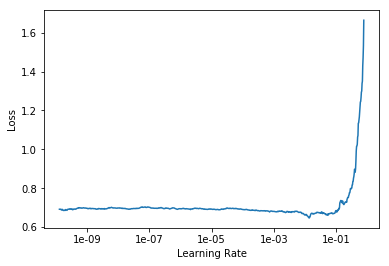

In [24]:
learn2.lr_find(start_lr=1e-10, num_it=1000)
learn2.recorder.plot()

In [31]:
learn2.fit_one_cycle(1, 1e-4)

Total time: 00:14
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_micro
1      0.700559    0.670141    0.605489  0.525795  0.605489  (00:14)



In [93]:
# factor = 8
# lr = 1e-5
# lrs = [lr / (factor ** (4 - x)) for x in range(4)] + [lr]
# # lrs = [lr for x in range(4)] + [lr]

# print(lrs)
# wd = 1e-7
# dropout_mult = 1
# encoder = 'now_real'

# learn = text_classifier_learner(data_clas, drop_mult=dropout_mult)
# learn.load_encoder(encoder)

# learn.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Weighted()]
# # learn.callbacks += [
# #     SaveModelCallback(learn, name=exp_id),
# # ]

# for i in range(1, 4):
#     epochs = 3
#     if i in [1, 2]:
#         learn.freeze_to(-i)
#     else:
#         learn.unfreeze()
#         learn.callbacks += [EarlyStoppingCallback(learn, patience=5)]
#         epochs = 10
#     learn.fit_one_cycle(epochs, np.array(lrs) * 1 / i, wd=wd, moms=[0.8, 0.7])

Total time: 00:32
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_weighted
1      0.701733    0.644992    0.627787  0.524225  0.652536     (00:11)
2      0.700016    0.686632    0.530017  0.514875  0.514728     (00:09)
3      0.697089    0.690030    0.521441  0.508668  0.506086     (00:11)



epoch,train_loss,valid_loss,accuracy,F1_macro,F1_weighted
1,0.701833,0.661699,0.608919,0.534580,0.617215


KeyboardInterrupt: 

In [17]:
factor = 3
lr = 1e-10
lrs = [lr / (factor ** (4 - x)) for x in range(4)] + [lr]
# lrs = [lr for x in range(4)] + [lr]

print(lrs)
wd = 1e-7
dropout_mult = 1
encoder = 'now_real'

learn = text_classifier_learner(data_clas, drop_mult=dropout_mult)
learn.load_encoder(encoder)

learn.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Weighted()]
# learn.callbacks += [
#     SaveModelCallback(learn, name=exp_id),
# ]

for i in range(1, 4):
    epochs = 1
    if i in [1, 2]:
        learn.freeze_to(-i)
    else:
        learn.unfreeze()
        learn.callbacks += [EarlyStoppingCallback(learn, patience=5)]
        epochs = 10
    learn.fit_one_cycle(epochs, np.array(lrs) * 1 / (i ** 4), wd=wd, moms=[0.8, 0.7])

Total time: 00:17
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_weighted
1      0.749068    0.694745    0.459691  0.458921  0.453212     (00:17)



epoch,train_loss,valid_loss,accuracy,F1_macro,F1_weighted


RuntimeError: CUDA error: out of memory

In [1]:
learn.lr_find()
learn.recorder.plot()

NameError: name 'learn' is not defined

In [68]:
factor = 1.5
lr = 1e-2
lrs = [lr / (factor ** (4 - x)) for x in range(4)] + [lr]
print(lrs)
wd = 1e-6
dropout_mult = 0.5
encoder = 'now_real'

learn = text_classifier_learner(data_clas, drop_mult=dropout_mult)
learn.load_encoder(encoder)

learn.metrics += [news_utils.fastai.F1Macro(), news_utils.fastai.F1Weighted()]

[0.0019753086419753087, 0.002962962962962963, 0.0044444444444444444, 0.006666666666666667, 0.01]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


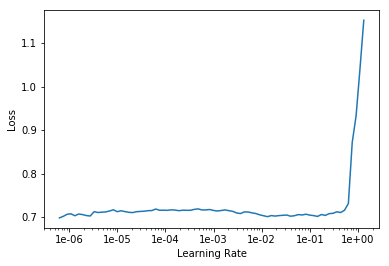

In [69]:
learn.lr_find()
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(1, 4e-2)

Total time: 00:10
epoch  train_loss  valid_loss  accuracy  F1_macro  F1_weighted
1      0.619760    0.982370    0.300172  0.269747  0.383521     (00:10)

